In [71]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [72]:
#Testing in the model on Florida Crimes
df = pd.read_csv("florida crimes.csv")

In [73]:
df = df.drop(['Rape\r(legacy\rdefinition)2'], axis=1)

In [74]:
df = df.rename(columns={'Violent\rcrime': 'Violent_Crime', 
                        'Murder and\rnonnegligent\rmanslaughter': 'Murder',
                       'Rape\r(revised\rdefinition)1' : 'Rape',
                       'Aggravated\rassault' : 'Aggravated_Assault',
                       'Property\rcrime': 'Property_Crime',
                       'Larceny-\rtheft': 'Larceny_Theft',
                       'Motor\rvehicle\rtheft': 'Motor_Vehicle_Theft',
                       'Arson3': 'Arson'})
print(df.head())

                City Population Violent_Crime  Murder  Rape Robbery  \
0            Alachua      9,338            36       0     2       2   
1  Altamonte Springs     42,040           150       0     8      37   
2              Altha        536             1       0     0       0   
3       Apalachicola      2,269             1       0     0       0   
4             Apopka     45,397           178       1    11      57   

  Aggravated_Assault Property_Crime Burglary Larceny_Theft  \
0                 32            166       40           120   
1                105          1,564      300         1,180   
2                  1              3        3             0   
3                  1             35        8            27   
4                109          1,527      231         1,202   

  Motor_Vehicle_Theft  Arson  
0                   6      1  
1                  84      3  
2                   0      0  
3                   0      0  
4                  94      6  


In [75]:
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Larceny_Theft'] = df['Larceny_Theft'].str.replace(',', '')
df['Property_Crime'] = df['Property_Crime'].str.replace(',', '')
df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Poperty_Crime'] = df['Property_Crime'].str.replace(',', '')
df['Aggravated_Assault'] = df['Aggravated_Assault'].str.replace(',', '')

In [76]:
df['Property_Crime'] = pd.to_numeric(df['Property_Crime'])
df['Population'] = pd.to_numeric(df['Population'])
df['Aggravated_Assault'] = pd.to_numeric(df['Aggravated_Assault'])

In [77]:
df['Robbery'] = pd.to_numeric(df['Robbery'])
df['Robbery_Cat'] = np.where(df['Robbery']>0, 1, 0)
df['Arson']=df['Arson'].fillna(0)
df['Property_Crime']=df['Property_Crime'].fillna(0)
print(df.head())

                City  Population Violent_Crime  Murder  Rape  Robbery  \
0            Alachua        9338            36       0     2        2   
1  Altamonte Springs       42040           150       0     8       37   
2              Altha         536             1       0     0        0   
3       Apalachicola        2269             1       0     0        0   
4             Apopka       45397           178       1    11       57   

   Aggravated_Assault  Property_Crime Burglary Larceny_Theft  \
0                  32         166.000       40           120   
1                 105        1564.000      300          1180   
2                   1           3.000        3             0   
3                   1          35.000        8            27   
4                 109        1527.000      231          1202   

  Motor_Vehicle_Theft  Arson Poperty_Crime  Robbery_Cat  
0                   6      1           166            1  
1                  84      3          1564            1  
2 

In [78]:
df['Murder'] = pd.to_numeric(df['Murder'])
df['Murder_Cat'] = np.where(df['Murder']>0, 1, 0)
print(df.head())

                City  Population Violent_Crime  Murder  Rape  Robbery  \
0            Alachua        9338            36       0     2        2   
1  Altamonte Springs       42040           150       0     8       37   
2              Altha         536             1       0     0        0   
3       Apalachicola        2269             1       0     0        0   
4             Apopka       45397           178       1    11       57   

   Aggravated_Assault  Property_Crime Burglary Larceny_Theft  \
0                  32         166.000       40           120   
1                 105        1564.000      300          1180   
2                   1           3.000        3             0   
3                   1          35.000        8            27   
4                 109        1527.000      231          1202   

  Motor_Vehicle_Theft  Arson Poperty_Crime  Robbery_Cat  Murder_Cat  
0                   6      1           166            1           0  
1                  84      3        

In [79]:
print(df.skew())

Population            7.059
Murder                9.071
Rape                  9.183
Robbery               8.423
Aggravated_Assault    6.773
Property_Crime        6.673
Arson                 6.840
Robbery_Cat          -1.743
Murder_Cat            0.577
dtype: float64


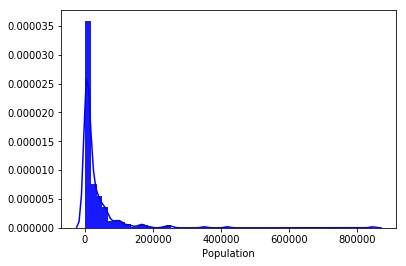

In [80]:
sns.distplot(df['Population'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117409400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11753d390>]], dtype=object)

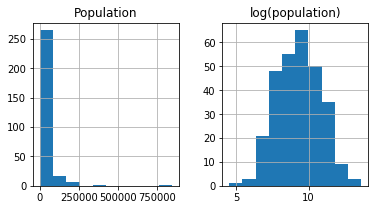

In [81]:
#Log the population variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Population":df["Population"], "log(population)":np.log(df["Population"])})
population.hist(bins = 10)

In [82]:
df['Population'] = np.log(df["Population"])

In [83]:
#If your data is suffering from nonlinearity, transform the dependent variables using sqrt, log, square, etc.
df['Population_Squared'] = df['Population']**2
print(df.head())

                City  Population Violent_Crime  Murder  Rape  Robbery  \
0            Alachua       9.142            36       0     2        2   
1  Altamonte Springs      10.646           150       0     8       37   
2              Altha       6.284             1       0     0        0   
3       Apalachicola       7.727             1       0     0        0   
4             Apopka      10.723           178       1    11       57   

   Aggravated_Assault  Property_Crime Burglary Larceny_Theft  \
0                  32         166.000       40           120   
1                 105        1564.000      300          1180   
2                   1           3.000        3             0   
3                   1          35.000        8            27   
4                 109        1527.000      231          1202   

  Motor_Vehicle_Theft  Arson Poperty_Crime  Robbery_Cat  Murder_Cat  \
0                   6      1           166            1           0   
1                  84      3      

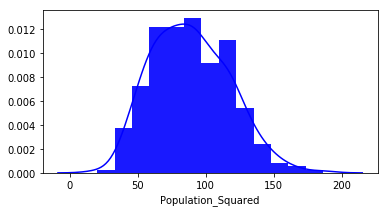

In [84]:
#Check if population squared is normally distributed.
sns.distplot(df['Population_Squared'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

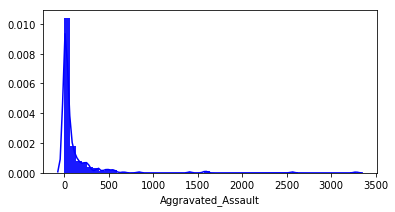

In [85]:
#Check if aggravated assault is normally distributed.
sns.distplot(df['Aggravated_Assault'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176bf390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117390160>]], dtype=object)

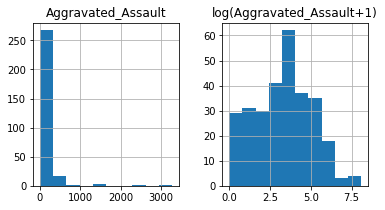

In [86]:
#Log the aggravated assault variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Aggravated_Assault":df["Aggravated_Assault"], 
                           "log(Aggravated_Assault+1)":np.log1p(df["Aggravated_Assault"])})
population.hist(bins = 10)

In [87]:
df['Aggravated_Assault'] = np.log1p(df["Aggravated_Assault"])

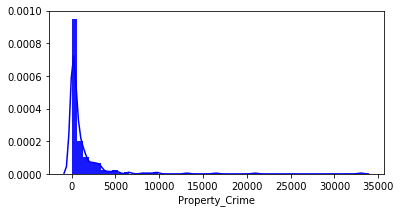

In [88]:
sns.distplot(df['Property_Crime'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117499cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1179d7278>]], dtype=object)

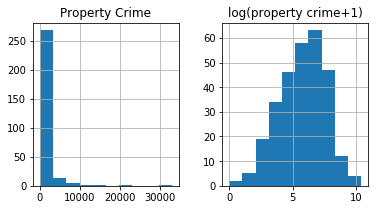

In [89]:
#Log the property crime variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Property Crime":df["Property_Crime"], "log(property crime+1)":np.log1p(df["Property_Crime"])})
population.hist(bins = 10)

In [90]:
df['Property_Crime'] = np.log1p(df["Property_Crime"])

In [91]:
linear_formula = 'Property_Crime ~ Population + Population_Squared + Aggravated_Assault + Murder_Cat + Robbery_Cat'
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.params

Intercept            -4.140
Population            1.083
Population_Squared   -0.018
Aggravated_Assault    0.307
Murder_Cat            0.070
Robbery_Cat           0.395
dtype: float64

In [92]:
lm.pvalues

Intercept            0.000
Population           0.000
Population_Squared   0.139
Aggravated_Assault   0.000
Murder_Cat           0.414
Robbery_Cat          0.001
dtype: float64

In [93]:
lm.rsquared

0.91618636098167516

In [94]:
regr = linear_model.LinearRegression()
x = df[['Population', 'Population_Squared', 'Aggravated_Assault','Murder_Cat', 'Robbery_Cat']]
y = df['Property_Crime'].values.reshape(-1,1)
regr.fit(x,y)

#Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x,y))


Coefficients: 
 [[ 1.08348315 -0.01754     0.30657766  0.07006359  0.39472295]]

Intercept: 
 [-4.14036293]

R-squared:
0.916186360982


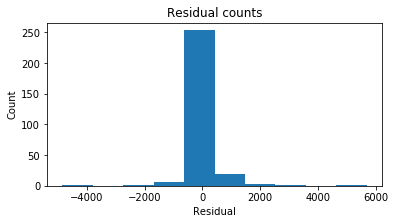

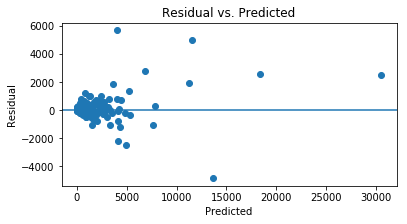

In [95]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
predicted = np.expm1(predicted)
actual = df['Property_Crime']
actual = np.expm1(actual)

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()